Linear Regression 

House price prediction using own dataset

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from scipy.optimize import curve_fit

Creating linear and non linear dataset for house price prediction

In [32]:
house_size=np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500]).reshape(-1,1)
house_size1=np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
house_price=np.array([65000, 80000, 95000, 110000, 125000, 140000, 155000, 170000, 185000, 200000])
house_price_nonLinear=np.array([70000, 90000, 105000, 125000, 135000, 155000, 165000, 180000, 190000, 200000])


Training or fitting the data in model

In [33]:
model=LinearRegression()
model.fit(house_size,house_price)
predicted_price=model.predict(house_size)
print(predicted_price)

[ 65000.  80000.  95000. 110000. 125000. 140000. 155000. 170000. 185000.
 200000.]


Creating non linear function for non-linear regression

In [34]:
def non_linear_func(x,a,b,c):
    return a* np.sqrt(x)+b*x+c

fitting the non linear model 

In [35]:
params, _ = curve_fit(non_linear_func, house_size1, house_price_nonLinear, p0=[1, 1, 1])
y_pred_nonlinear = non_linear_func(house_size, *params)

Evaluating the model

In [36]:
#Linear Regression metrics
mse_linear = mean_squared_error(house_price, predicted_price)
mae_linear = mean_absolute_error(house_price, predicted_price)

In [37]:
# non linear metrics
mse_nonlinear = mean_squared_error(house_price_nonLinear, y_pred_nonlinear)
mae_nonlinear = mean_absolute_error(house_price_nonLinear, y_pred_nonlinear)

In [38]:
print("Linear Regression:")
print(f"  Mean Squared Error (MSE): {mse_linear}")
print(f"  Mean Absolute Error (MAE): {mae_linear}")

print("\nNon-Linear Regression:")
print(f"  Mean Squared Error (MSE): {mse_nonlinear}")
print(f"  Mean Absolute Error (MAE): {mae_nonlinear}")

Linear Regression:
  Mean Squared Error (MSE): 2.594038400966295e-22
  Mean Absolute Error (MAE): 1.0913936421275139e-11

Non-Linear Regression:
  Mean Squared Error (MSE): 3874787.237004017
  Mean Absolute Error (MAE): 1580.7974571236293


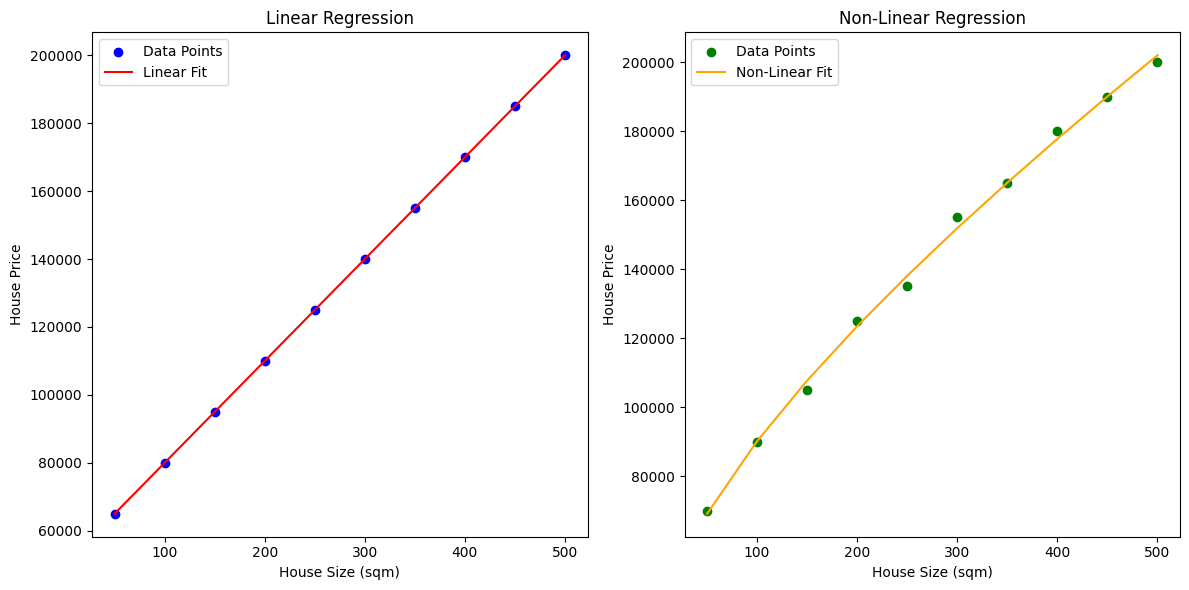

In [39]:
# plotting the result
plt.figure(figsize=(12, 6))
# linear regression plot
plt.subplot(1, 2, 1)
plt.scatter(house_size, house_price, color='blue', label='Data Points')
plt.plot(house_size, predicted_price, color='red', label='Linear Fit')
plt.title("Linear Regression")
plt.xlabel("House Size (sqm)")
plt.ylabel("House Price")
plt.legend()
# Non-Linear Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(house_size, house_price_nonLinear, color='green', label='Data Points')
plt.plot(house_size, y_pred_nonlinear, color='orange', label='Non-Linear Fit')
plt.title("Non-Linear Regression")
plt.xlabel("House Size (sqm)")
plt.ylabel("House Price")
plt.legend()
plt.tight_layout()
plt.show()